# Exploratory Data Analysis

### Importing libraries and define functions

In [1]:
import pandas as pd
import numpy as np
import scipy
import math
import os
import sys

In [2]:
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)
%config InlineBackend.figure_format = 'retina'

In [3]:
# Managing Warnings 
import warnings
warnings.filterwarnings('ignore')

if not sys.warnoptions:
    warnings.simplefilter("ignore")
    os.environ["PYTHONWARNINGS"] = "ignore" # Also affect subprocesses

In [4]:
import sklearn
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [5]:
from pycaret.regression import *

In [6]:
import functions as f

### Define dataset columns

In [7]:
df_columns = ['NP_type', 'Coating','core_size_nm','hydro_size_nm','Surf_charge_mV','Surface_area_m2_g',
               'shape','Dose_microg_mL','Duration_h','Cell_name','Cell_species','cell_Organ','Cell_morphology',
               'Cell_age','cell_type','sex','Assay','Test_indicator','Viability']

In [8]:
categorical_columns = ['NP_type', 'Coating','shape','Cell_name','Cell_species','cell_Organ','Cell_morphology',
                       'Cell_age','cell_type','sex','Assay','Test_indicator']
numerical_columns = ['core_size_nm','hydro_size_nm','Surf_charge_mV','Surface_area_m2_g','Dose_microg_mL','Duration_h',
                    'Viability']

numerical_columns_no_target = ['core_size_nm','hydro_size_nm','Surf_charge_mV','Surface_area_m2_g','Dose_microg_mL','Duration_h']

### Loading the input data into the data frame.

In [9]:
df = pd.read_csv("input/nano_dataset.txt", sep="\t", encoding="unicode_escape", usecols=df_columns)

In [10]:
data_df = f.canonicalize_dataset(df)

Does numeric columns have float64 pandas type? 

Duration_h: True
core_size_nm: True
hydro_size_nm: True
Surf_charge_mV: True
Surface_area_m2_g: True
Dose_microg_mL: True
Duration_h: True
Viability: True

Final column types: 

NP_type                object
Coating                object
core_size_nm          float64
hydro_size_nm         float64
Surf_charge_mV        float64
Surface_area_m2_g     float64
shape                  object
Dose_microg_mL        float64
Duration_h            float64
Cell_name              object
Cell_species           object
cell_Organ             object
Cell_morphology        object
Cell_age               object
cell_type              object
sex                    object
Assay                  object
Test_indicator         object
nanomaterial_group     object
Viability             float64
dtype: object

NP types that fall into the 'other' group:
['Au' 'Ag' 'Chitosan' 'Ni' 'PLGA' 'Polystyrene' 'SLN' 'Hydroxyapatite'
 'Mo' 'Alginate' 'Dendrimer' 'Liposomes' 'WO

In [11]:
data_df.shape

(11315, 20)

In [12]:
data_df = data_df.dropna(subset=['hydro_size_nm', 'Surf_charge_mV', 'Surface_area_m2_g', 'shape'], thresh=2)


In [13]:
data_df.shape

(4656, 20)

In [14]:
data_df.head(n=5)

,NP_type,Coating,core_size_nm,hydro_size_nm,Surf_charge_mV,Surface_area_m2_g,shape,Dose_microg_mL,Duration_h,Cell_name,Cell_species,cell_Organ,Cell_morphology,Cell_age,cell_type,sex,Assay,Test_indicator,nanomaterial_group,Viability
86,SiO2,None,NaN,229.5,-21.77,NaN,Sphere,8.0,24.0,16HBE14,Human,Heart,Epithelial,Young,Normal,male,CCK_8,TetrazoliumSalt,meta_oxide,101.06
87,SiO2,None,NaN,229.5,-21.77,NaN,Sphere,16.0,24.0,16HBE14,Human,Heart,Epithelial,Young,Normal,male,CCK_8,TetrazoliumSalt,meta_oxide,102.73
88,SiO2,None,NaN,229.5,-21.77,NaN,Sphere,32.0,24.0,16HBE14,Human,Heart,Epithelial,Young,Normal,male,CCK_8,TetrazoliumSalt,meta_oxide,103.64
89,SiO2,None,NaN,229.5,-21.77,NaN,Sphere,64.0,24.0,16HBE14,Human,Heart,Epithelial,Young,Normal,male,CCK_8,TetrazoliumSalt,meta_oxide,106.22
90,SiO2,None,NaN,229.5,-21.77,NaN,Sphere,128.0,24.0,16HBE14,Human,Heart,Epithelial,Young,Normal,male,CCK_8,TetrazoliumSalt,meta_oxide,72.99


### Describe dataframe

#### Describe numerical columns

In [15]:
data_df.describe()

,core_size_nm,hydro_size_nm,Surf_charge_mV,Surface_area_m2_g,Dose_microg_mL,Duration_h,Viability
count,4316.000000,2477.000000,4522.000000,574.000000,4542.000000,4320.000000,4656.000000
mean,76.921152,321.916254,-8.667457,77.222125,139.757118,32.362269,76.052826
std,110.185593,307.647375,29.007843,104.430464,524.960714,20.653045,31.798840
min,1.150000,8.700000,-158.000000,7.000000,0.000000,1.000000,-3.870000
25%,20.000000,124.000000,-27.700000,20.000000,3.900000,24.000000,58.000000
50%,39.200000,258.550000,-13.000000,40.000000,25.000000,24.000000,87.630000
75%,99.000000,400.000000,1.700000,82.800000,100.000000,48.000000,99.010000
max,851.050000,2029.000000,256.000000,576.230000,14015.200000,96.000000,234.630000


#### Describe categorical columns

In [16]:
data_df.describe(include=["bool", "object"])

,NP_type,Coating,shape,Cell_name,Cell_species,cell_Organ,Cell_morphology,Cell_age,cell_type,sex,Assay,Test_indicator,nanomaterial_group
count,4656,4656,3344,4656,4656,4656,4636,4485,4636,3379,4656,4646,4656
unique,53,34,12,82,8,30,15,4,2,2,19,12,5
top,Ag,None,Sphere,A549,Human,Lung,Epithelial,Adult,cancer,male,MTT,TetrazoliumSalt,meta_oxide
freq,552,3243,2496,419,3687,1032,2289,3248,2733,2040,2197,3278,2544


### Count missing values

In [17]:
print(data_df.isnull().sum())

NP_type                  0
Coating                  0
core_size_nm           340
hydro_size_nm         2179
Surf_charge_mV         134
Surface_area_m2_g     4082
shape                 1312
Dose_microg_mL         114
Duration_h             336
Cell_name                0
Cell_species             0
cell_Organ               0
Cell_morphology         20
Cell_age               171
cell_type               20
sex                   1277
Assay                    0
Test_indicator          10
nanomaterial_group       0
Viability                0
dtype: int64


In [18]:
percent_missing = data_df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': data_df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)

In [19]:
missing_value_df

,column_name,percent_missing
NP_type,NP_type,0.000000
Assay,Assay,0.000000
cell_Organ,cell_Organ,0.000000
Cell_species,Cell_species,0.000000
nanomaterial_group,nanomaterial_group,0.000000
Cell_name,Cell_name,0.000000
Coating,Coating,0.000000
Viability,Viability,0.000000
Test_indicator,Test_indicator,0.086266
Cell_morphology,Cell_morphology,0.172533


### Plot features (categorical and numerical)

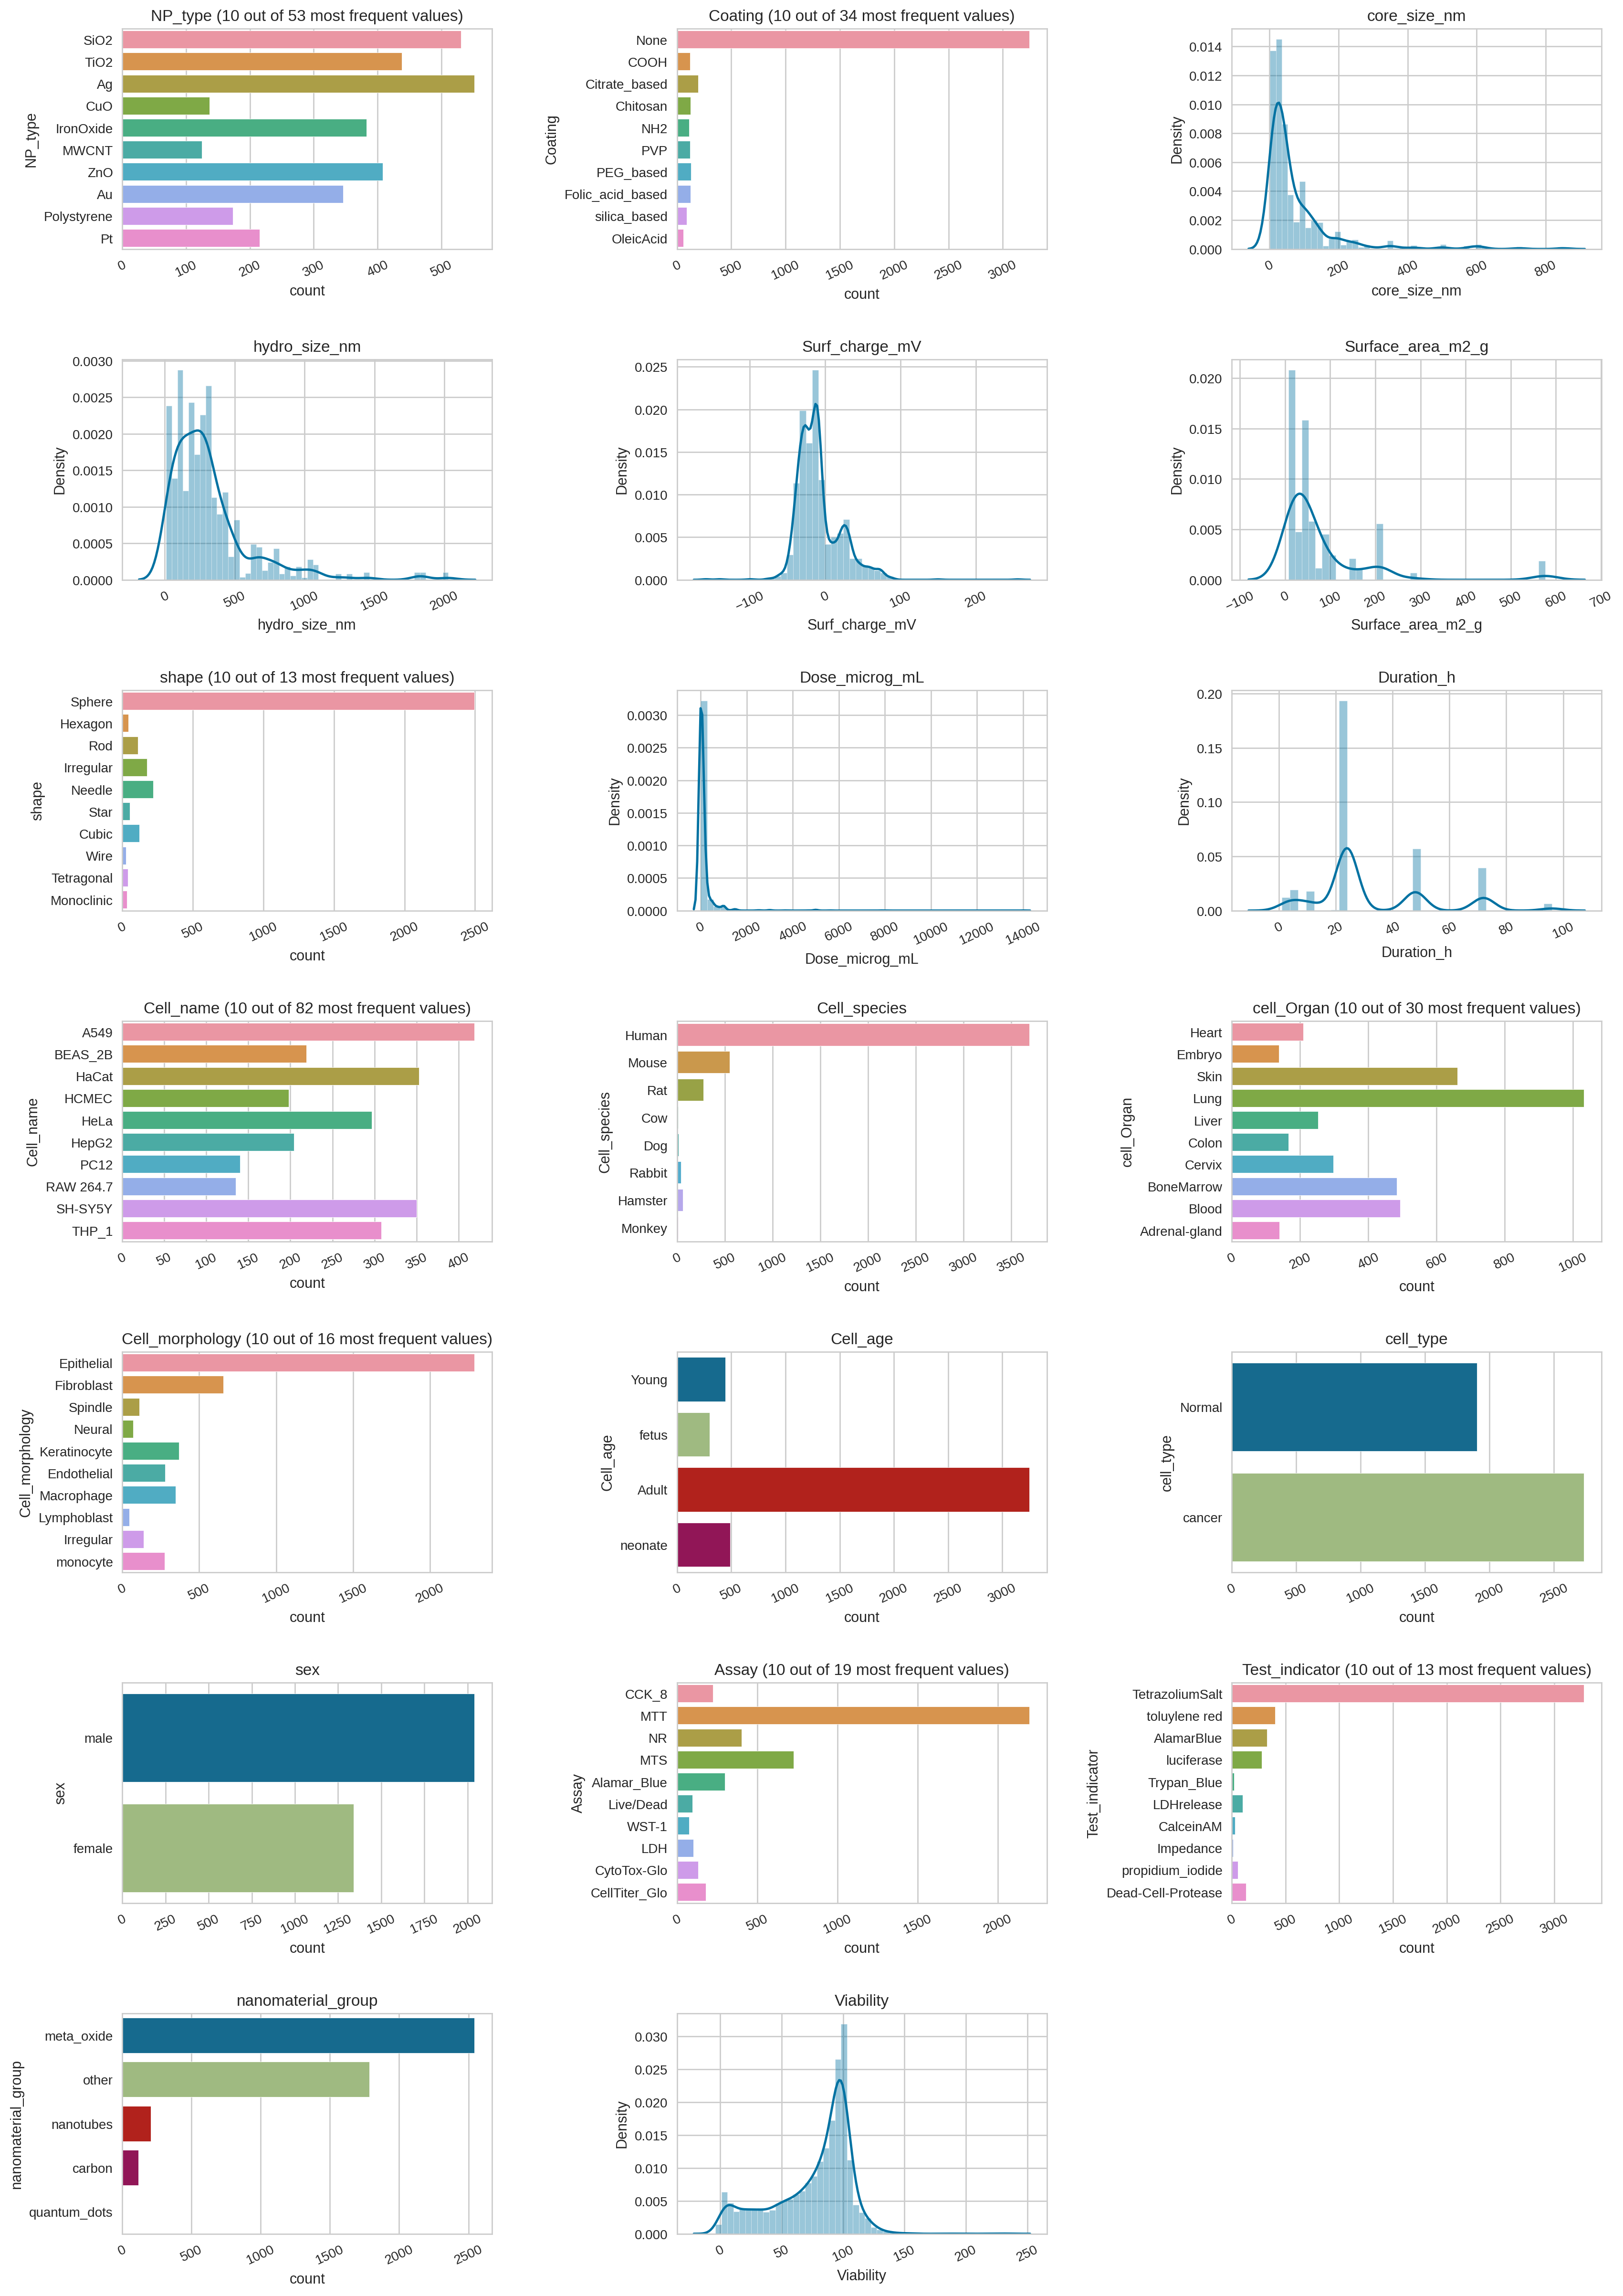

In [20]:
f.plot_distribution(data_df)

### Create training set and test set

In [21]:
data_df = f.quantile_discretize(data_df, 'Viability')

In [22]:
data_df.dtypes

NP_type                 object
Coating                 object
core_size_nm           float64
hydro_size_nm          float64
Surf_charge_mV         float64
Surface_area_m2_g      float64
shape                   object
Dose_microg_mL         float64
Duration_h             float64
Cell_name               object
Cell_species            object
cell_Organ              object
Cell_morphology         object
Cell_age                object
cell_type               object
sex                     object
Assay                   object
Test_indicator          object
nanomaterial_group      object
Viability              float64
Viability_discrete    category
dtype: object

In [23]:
data_df.Duration_h.unique()

array([24., 96., 72.,  6., 48.,  4., 12.,  3., nan, 20.,  2.,  1., 36.,
        9.])

In [24]:
splitter = setup(data = data_df, target = 'Viability_discrete',
                 preprocess = False,
                 train_size=0.8,
                 categorical_features=categorical_columns,
                 numeric_features=numerical_columns,
                 data_split_stratify=True,
                 # don't change the following
                 session_id = 123,
                 use_gpu=False,
                 log_experiment = False,
                 silent=True,
                 experiment_name = 'splitter')

,Description,Value
0,session_id,123
1,Target,Viability_discrete
2,Original Data,"(4656, 21)"
3,Missing Values,True
4,Numeric Features,7
5,Categorical Features,13
6,Transformed Train Set,"(3724, 20)"
7,Transformed Test Set,"(932, 20)"
8,Shuffle Train-Test,True
9,Stratify Train-Test,True


In [25]:
data_train_df = get_config(variable="X_train").copy()
#data_train_df['Viability'] = get_config(variable="y_train")

data_test_df = get_config(variable="X_test").copy()
#data_test_df['Viability'] = get_config(variable="y_test")

In [26]:
#data_train_df = pd.read_csv("output/datasets/universal/data_regression_train_df.csv", encoding="utf-8")
#data_test_df = pd.read_csv("output/datasets/universal/data_regression_test_df.csv", encoding="utf-8")

In [27]:
print(data_train_df.shape)
print(data_test_df.shape)

(3724, 20)
(932, 20)


In [28]:
data_train_df.dtypes

NP_type                object
Coating                object
core_size_nm          float32
hydro_size_nm         float32
Surf_charge_mV        float32
Surface_area_m2_g     float32
shape                  object
Dose_microg_mL        float32
Duration_h            float32
Cell_name              object
Cell_species           object
cell_Organ             object
Cell_morphology        object
Cell_age               object
cell_type              object
sex                    object
Assay                  object
Test_indicator         object
nanomaterial_group     object
Viability             float32
dtype: object

In [29]:
data_train_df["Duration_h"] = pd.to_numeric(data_train_df["Duration_h"])
data_train_df["Duration_h"] = data_train_df["Duration_h"].astype(float)

data_test_df["Duration_h"] = pd.to_numeric(data_test_df["Duration_h"])
data_test_df["Duration_h"] = data_test_df["Duration_h"].astype(float)

In [30]:
data_train_df.dtypes

NP_type                object
Coating                object
core_size_nm          float32
hydro_size_nm         float32
Surf_charge_mV        float32
Surface_area_m2_g     float32
shape                  object
Dose_microg_mL        float32
Duration_h            float64
Cell_name              object
Cell_species           object
cell_Organ             object
Cell_morphology        object
Cell_age               object
cell_type              object
sex                    object
Assay                  object
Test_indicator         object
nanomaterial_group     object
Viability             float32
dtype: object

In [31]:
data_test_df.dtypes

NP_type                object
Coating                object
core_size_nm          float32
hydro_size_nm         float32
Surf_charge_mV        float32
Surface_area_m2_g     float32
shape                  object
Dose_microg_mL        float32
Duration_h            float64
Cell_name              object
Cell_species           object
cell_Organ             object
Cell_morphology        object
Cell_age               object
cell_type              object
sex                    object
Assay                  object
Test_indicator         object
nanomaterial_group     object
Viability             float32
dtype: object

In [32]:
data_train_df.Duration_h.unique()        

array([nan,  4., 24., 72., 48., 96.,  6., 12.,  3., 36., 20.,  9.,  1.,
        2.])

### Plot numerical variables distribution of train and test sets 

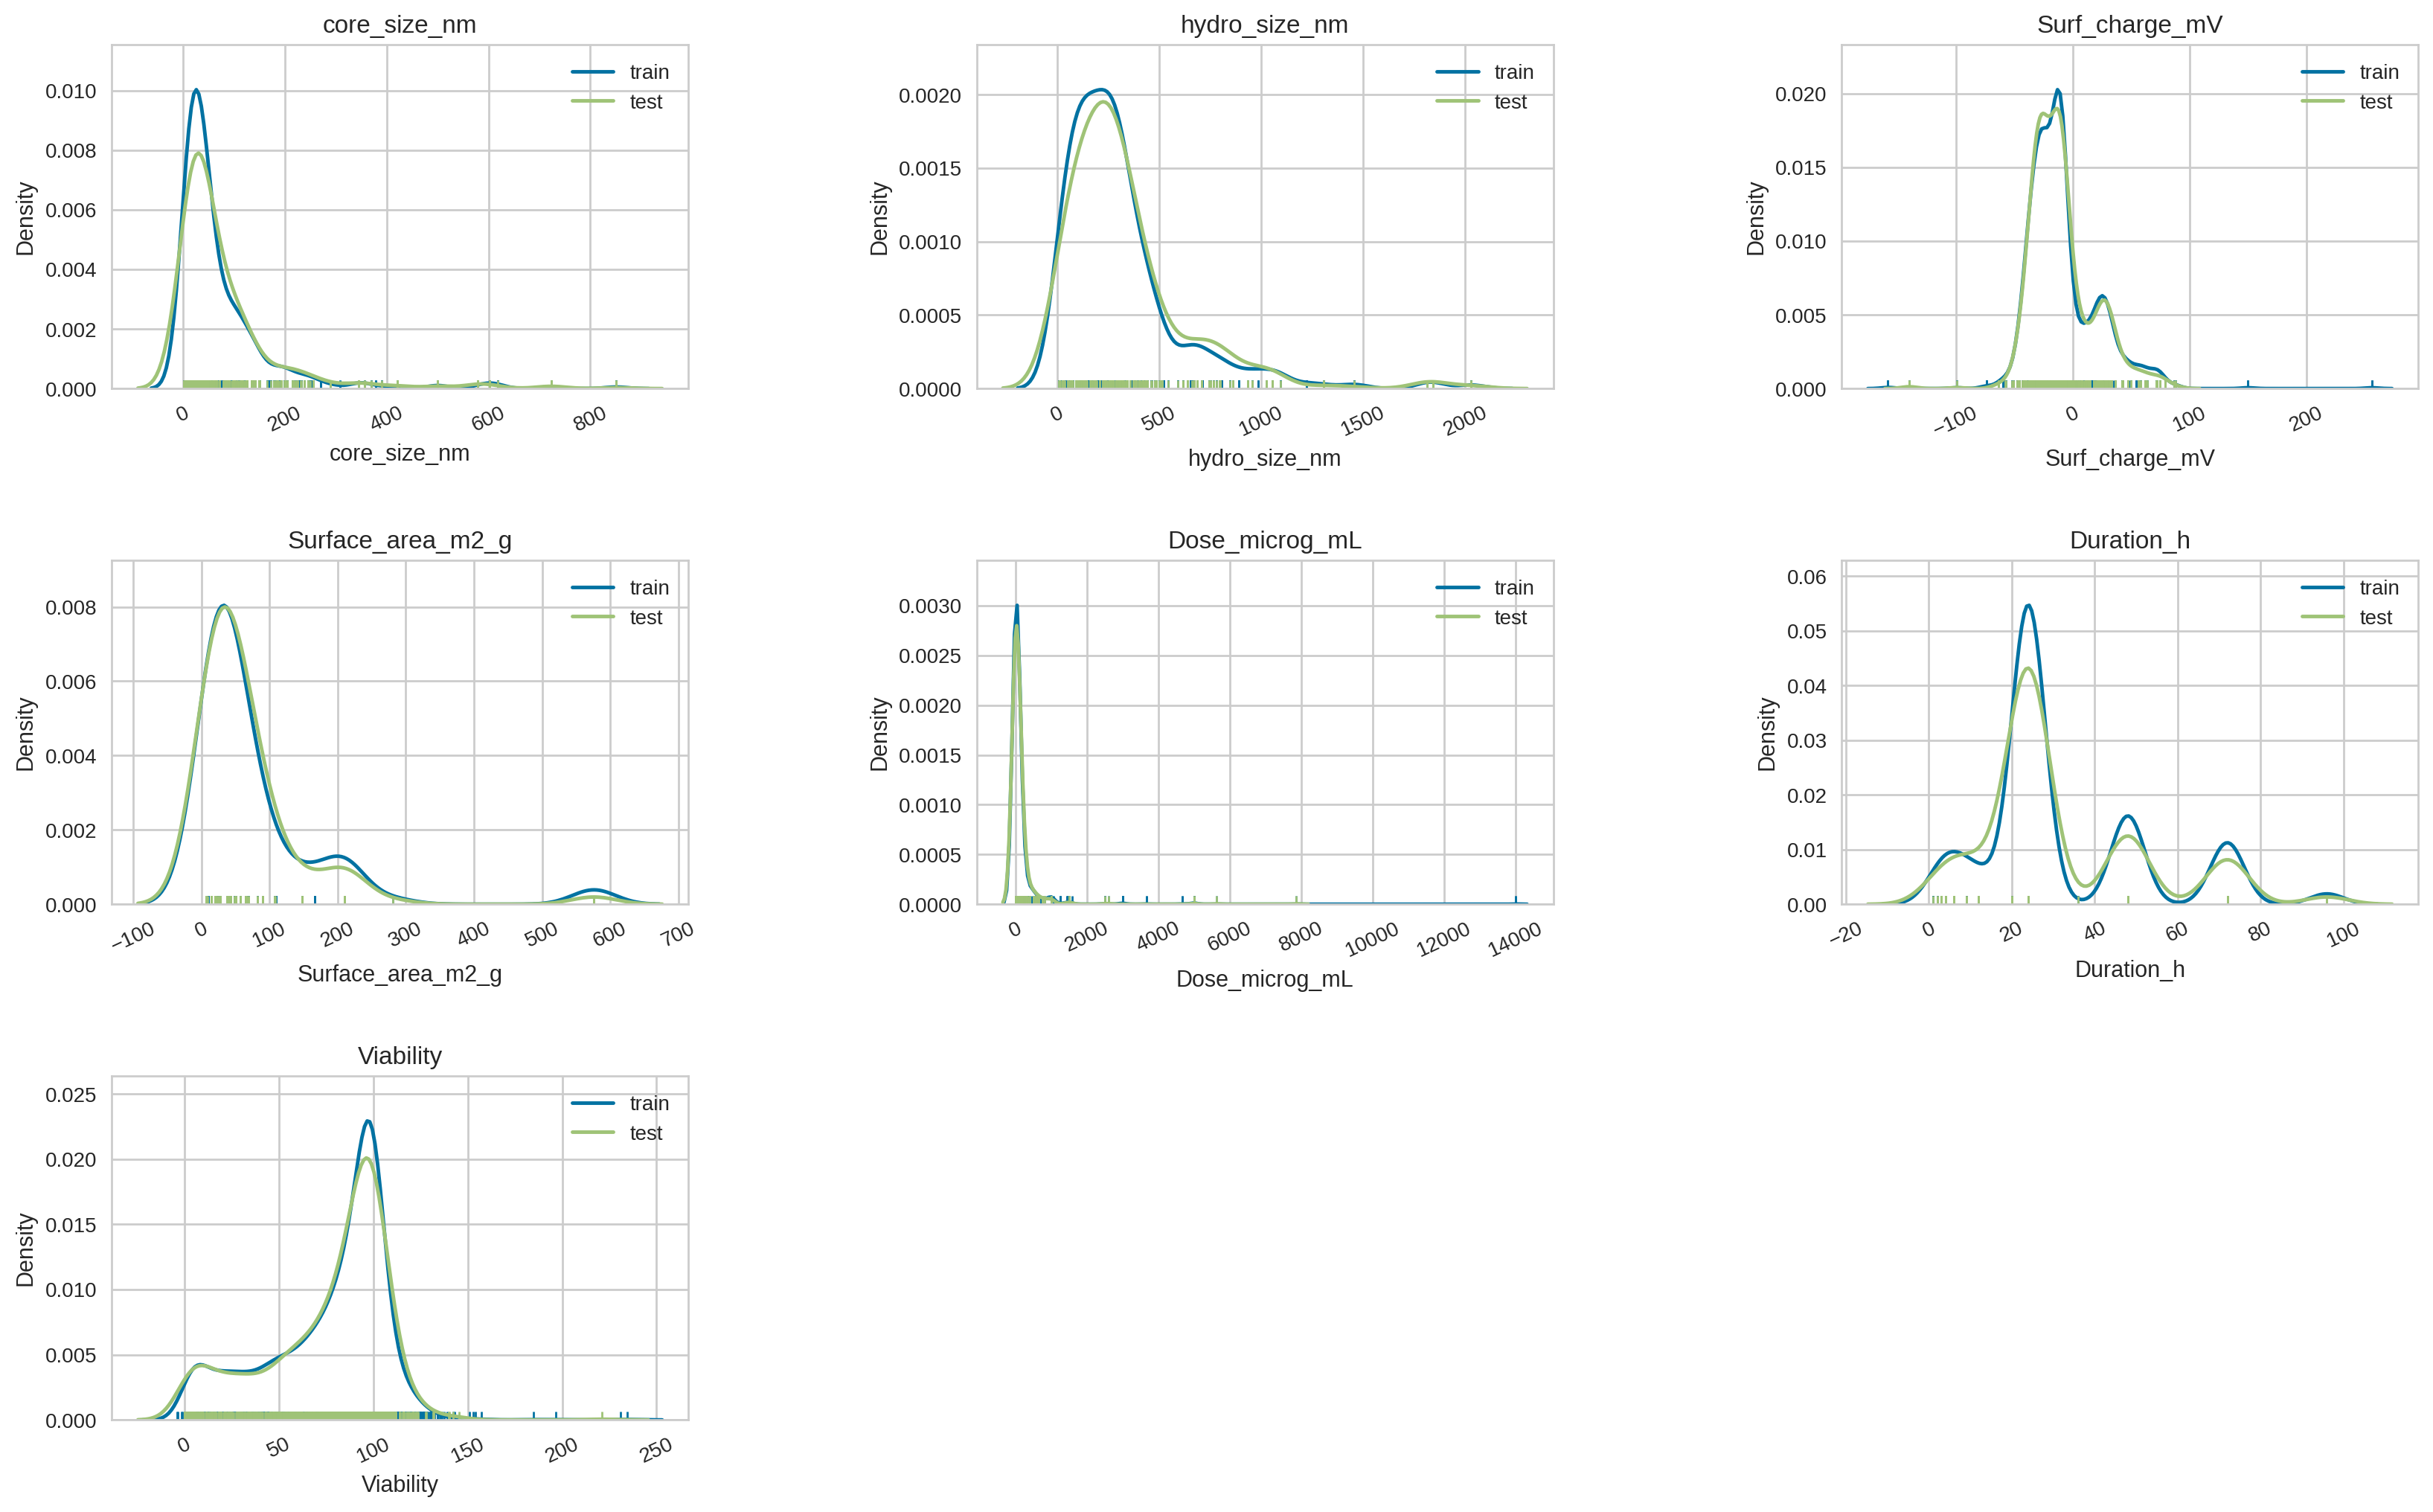

In [33]:
f.plot_distribution_train_test(data_train_df, data_test_df)

### Prepare classification datasets

In [34]:
data_df = data_df.drop('Viability_discrete',axis=1)

In [35]:
data_classification_df = f.convert_to_classification_dataset(data_df.copy())

In [36]:
data_classification_df.shape

(4656, 20)

In [37]:
splitter_classification = setup(data = data_classification_df, target = 'viability_class',
                             preprocess = False,
                             train_size=0.8,
                             categorical_features=categorical_columns,
                             numeric_features=numerical_columns_no_target,
                             data_split_stratify=True,
                             # don't change the following
                             session_id = 123,
                             use_gpu=False,
                             log_experiment = False,
                             silent=True,
                             experiment_name = 'splitter_classificiation')

,Description,Value
0,session_id,123
1,Target,viability_class
2,Original Data,"(4656, 20)"
3,Missing Values,True
4,Numeric Features,6
5,Categorical Features,13
6,Transformed Train Set,"(3724, 19)"
7,Transformed Test Set,"(932, 19)"
8,Shuffle Train-Test,True
9,Stratify Train-Test,True


In [38]:
data_classification_train_df = get_config(variable="X_train").copy()
data_classification_train_df['viability_class'] = get_config(variable="y_train").copy()

data_classification_test_df = get_config(variable="X_test").copy()
data_classification_test_df['viability_class'] = get_config(variable="y_test").copy()

In [39]:
print(data_classification_train_df.shape)
print(data_classification_test_df.shape)

(3724, 20)
(932, 20)


In [40]:
print(data_classification_train_df['viability_class'].value_counts())
print(data_classification_test_df['viability_class'].value_counts())

NonToxic    2944
Toxic        780
Name: viability_class, dtype: int64
NonToxic    737
Toxic       195
Name: viability_class, dtype: int64


### Save cleaned datasets

In [41]:
data_train_df.to_csv('output/datasets/universal/data_regression_train_df.csv', encoding='utf-8', index=False)

In [42]:
data_test_df.to_csv('output/datasets/universal/data_regression_test_df.csv', encoding='utf-8', index=False)

In [43]:
data_classification_train_df.to_csv('output/datasets/universal/data_classification_train_df.csv', encoding='utf-8', index=False)

In [44]:
data_classification_test_df.to_csv('output/datasets/universal/data_classification_test_df.csv', encoding='utf-8', index=False)

### Read cleaned datasets

In [45]:
data_train_df = pd.read_csv('output/datasets/universal/data_regression_train_df.csv', encoding='utf-8')

# PyCaret

In [46]:
os.environ["GIT_PYTHON_REFRESH"] = "quiet"

## Define data preprocessing scenarios

In [47]:
features_scenarios = list()

scenario1 = {}
scenario1["ID"] = 1
scenario1["ignore_features"] = ["NP_type", "Coating", "Cell_name"]
scenario1["high_cardinality_features"] = ["cell_Organ", "Cell_morphology", "Assay"]

scenario2 = {}
scenario2["ID"] = 2
scenario2["ignore_features"] = ["NP_type", "Coating", "Cell_name"]
scenario2["high_cardinality_features"] = None

scenario3 = {}
scenario3["ID"] = 3
scenario3["ignore_features"] = ["nanomaterial_group", "Coating", "Cell_name"]
scenario3["high_cardinality_features"] = ["cell_Organ", "Cell_morphology", "Assay"]

scenario4 = {}
scenario4["ID"] = 4
scenario4["ignore_features"] = ["nanomaterial_group", "Coating", "Cell_name"]
scenario4["high_cardinality_features"] = None

scenario5 = {}
scenario5["ID"] = 5
scenario5["ignore_features"] = None
scenario5["high_cardinality_features"] = ["NP_type", "Coating", "Cell_name"]

scenario6 = {}
scenario6["ID"] = 6
scenario6["ignore_features"] = None
scenario6["high_cardinality_features"] = ["NP_type", "Coating", "Cell_name", "cell_Organ", "Cell_morphology", "Assay"]

scenario7 = {}
scenario7["ID"] = 7
scenario7["ignore_features"] = None
scenario7["high_cardinality_features"] = ["Coating", "Cell_name"]

scenario8 = {}
scenario8["ID"] = 8
scenario8["ignore_features"] = None
scenario8["high_cardinality_features"] = ["Coating", "Cell_name", "cell_Organ", "Cell_morphology", "Assay"]

scenario9 = {}
scenario9["ID"] = 9
scenario9["ignore_features"] = None
scenario9["high_cardinality_features"] = None


features_scenarios.append(scenario1)
features_scenarios.append(scenario2)
features_scenarios.append(scenario3)
features_scenarios.append(scenario4)
features_scenarios.append(scenario5)
features_scenarios.append(scenario6)
features_scenarios.append(scenario7)
features_scenarios.append(scenario8)
features_scenarios.append(scenario9)

imputation_scenarios = list()

scenario1 = {}
scenario1["ID"] = 1
scenario1["imputation_type"] = "simple"
scenario1["numeric_imputation"] = "median"

scenario2 = {}
scenario2["ID"] = 2
scenario2["imputation_type"] = "simple"
scenario2["numeric_imputation"] = "mean"

scenario3 = {}
scenario3["ID"] = 3
scenario3["imputation_type"] = "iterative"
scenario3["numeric_imputation"] = "mean"

imputation_scenarios.append(scenario1)
imputation_scenarios.append(scenario2)
imputation_scenarios.append(scenario3)



preprocess_scenarios = list()

scenario1 = {}
scenario1["ID"] = 1
scenario1["normalize"] = True
scenario1["remove_outliers"] = True

scenario2 = {}
scenario2["ID"] = 2
scenario2["normalize"] = True
scenario2["remove_outliers"] = False

scenario3 = {}
scenario3["ID"] = 3
scenario3["normalize"] = False
scenario3["remove_outliers"] = True

scenario4 = {}
scenario4["ID"] = 4
scenario4["normalize"] = False
scenario4["remove_outliers"] = False

preprocess_scenarios.append(scenario1)
preprocess_scenarios.append(scenario2)
preprocess_scenarios.append(scenario3)
preprocess_scenarios.append(scenario4)

In [48]:
data_train_df.columns

Index(['NP_type', 'Coating', 'core_size_nm', 'hydro_size_nm', 'Surf_charge_mV',
       'Surface_area_m2_g', 'shape', 'Dose_microg_mL', 'Duration_h',
       'Cell_name', 'Cell_species', 'cell_Organ', 'Cell_morphology',
       'Cell_age', 'cell_type', 'sex', 'Assay', 'Test_indicator',
       'nanomaterial_group', 'Viability'],
      dtype='object')

## Run PyCaret for all the scenarios 108 in total (9 X 3 X 4)

In [49]:
seed = 123456

In [50]:
y = data_train_df.copy()[['Viability']]
X = data_train_df.drop('Viability', axis=1).copy()

In [51]:
data_prepr_train_X, data_prepr_test_X, data_prepr_train_y, data_prepr_test_y = train_test_split(X, y, test_size=0.2, random_state=seed)

In [52]:
data_prepr_train_X = data_prepr_train_X.reset_index(drop=True)
data_prepr_test_X = data_prepr_test_X.reset_index(drop=True)
data_prepr_train_y = data_prepr_train_y.reset_index(drop=True)
data_prepr_test_y = data_prepr_test_y.reset_index(drop=True)

In [53]:
data_prepr_train = pd.concat([data_prepr_train_X, data_prepr_train_y], axis=1)

In [54]:
data_prepr_train.shape

(2979, 20)

In [55]:
data_prepr_test = pd.concat([data_prepr_test_X, data_prepr_test_y], axis=1)

In [56]:
data_prepr_test.shape

(745, 20)

In [57]:
data_prepr_train.to_csv('output/datasets/universal/data_preprocessing_train_df.csv', encoding='utf-8', index=False)
data_prepr_test.to_csv('output/datasets/universal/data_preprocessing_test_df.csv', encoding='utf-8', index=False)

In [58]:
data_prepr_train.dtypes

NP_type                object
Coating                object
core_size_nm          float64
hydro_size_nm         float64
Surf_charge_mV        float64
Surface_area_m2_g     float64
shape                  object
Dose_microg_mL        float64
Duration_h            float64
Cell_name              object
Cell_species           object
cell_Organ             object
Cell_morphology        object
Cell_age               object
cell_type              object
sex                    object
Assay                  object
Test_indicator         object
nanomaterial_group     object
Viability             float64
dtype: object

In [59]:
i = 0
j = 0
k = 0

for features_scenario in features_scenarios:
    i = features_scenario["ID"] 
    for imputation_scenario in imputation_scenarios:
        j = imputation_scenario["ID"]
        for preprocess_scenario in preprocess_scenarios:
            k = preprocess_scenario["ID"]
                                
            print(imputation_scenario["imputation_type"])
            print(imputation_scenario["numeric_imputation"])
            print(features_scenario["ignore_features"])
            print(features_scenario["high_cardinality_features"])
            print(preprocess_scenario["normalize"])
            print(preprocess_scenario["remove_outliers"])

            stup = setup(data = data_prepr_train, target = 'Viability', 
                test_data = data_prepr_test,
                
                categorical_features=categorical_columns,
                numeric_features=numerical_columns_no_target,
                
                imputation_type = imputation_scenario["imputation_type"], #default
                numeric_imputation = imputation_scenario["numeric_imputation"], #default: mean

                categorical_imputation = "constant", #default: constant
                iterative_imputation_iters = 5, #default: 5
                numeric_iterative_imputer = "lightgbm",
                categorical_iterative_imputer = "lightgbm",

                ignore_features = features_scenario["ignore_features"],
                bin_numeric_features = None,
                high_cardinality_features = features_scenario["high_cardinality_features"],

                high_cardinality_method = "frequency", #default: frequency
                handle_unknown_categorical = True, #default
                unknown_categorical_method = "least_frequent", #default

                normalize = preprocess_scenario["normalize"], #default: False
                remove_outliers= preprocess_scenario["remove_outliers"], #default: False

                outliers_threshold = 0.05, #default

                transformation= False, #default
                transformation_method = 'yeo-johnson', #default
                transform_target = False, 
                combine_rare_levels = False,
                rare_level_threshold = 0.1, #default: 0.1

                remove_multicollinearity = False, #default 
                multicollinearity_threshold = 0.9, #default

                ignore_low_variance = True, 

                feature_interaction = False, 
                feature_ratio = False,
                polynomial_features = False, 
                trigonometry_features = False,

                train_size=0.95,
                
                # don't change the following
                session_id = seed,
                use_gpu=False,
                log_experiment = False,
                silent=True,
                experiment_name = 'nanosafety')
            
            set_config('seed', seed)

            best = compare_models(include = ['lr', 'lasso', 'ridge', 'svm', 'rf', 'et', 'lightgbm', 'gbr'], 
                                  n_select = 3, 
                                  cross_validation=False)

            results_df = pull()

            results_df = results_df.reset_index(level=0)

            results_df.to_csv("output/preprocessing_scenarios/" + "-".join([str(i), str(j), str(k)])+".tsv", 
                                                         index=False, encoding="utf-8", sep="\t")

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,8.6785,184.7915,13.5938,0.8183,0.3915,0.4066,0.6200
rf,Random Forest Regressor,10.2430,243.1965,15.5948,0.7609,0.4613,0.5786,0.6900
lightgbm,Light Gradient Boosting Machine,11.2205,267.9917,16.3705,0.7365,0.4899,0.6327,0.2000
gbr,Gradient Boosting Regressor,15.2532,421.8128,20.5381,0.5852,0.6144,0.9937,0.5900
ridge,Ridge Regression,18.0657,569.4682,23.8635,0.4400,0.6454,1.0552,0.0100
lr,Linear Regression,18.1847,591.6828,24.3245,0.4182,0.6426,1.0338,0.0200
lasso,Lasso Regression,23.3296,862.0926,29.3614,0.1523,0.7565,1.4890,0.0100
svm,Support Vector Regression,23.0276,1009.1241,31.7667,0.0077,0.8107,1.7309,1.8000


## Aggregate preprocessing scenarios model comparison results from 96 experiments

In [60]:
results_list = os.listdir("output/preprocessing_scenarios")

In [61]:
os.path.splitext(os.path.basename("output/preprocessing_scenarios/"+results_list[0]))[0]

'1-1-1'

In [62]:
li = []

for result_file in results_list:
    
    scenario = os.path.splitext(os.path.basename("output/preprocessing_scenarios/"+result_file))[0]
    df = pd.read_csv("output/preprocessing_scenarios/"+result_file, encoding="utf-8", index_col=None, header=0, sep="\t")
    df['scenario'] = scenario
    li.append(df)

In [63]:
final_df = pd.concat(li, axis=0, ignore_index=True)
final_df = final_df.reset_index(drop=True)

print(final_df.shape)

(648, 10)


In [64]:
final_df.dtypes

index        object
Model        object
MAE         float64
MSE         float64
RMSE        float64
R2          float64
RMSLE       float64
MAPE        float64
TT (Sec)    float64
scenario     object
dtype: object

In [65]:
final_df.head()

,index,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec),scenario
0,rf,Random Forest Regressor,10.5422,263.4316,16.2306,0.7410,0.4689,0.5780,0.56,1-1-1
1,et,Extra Trees Regressor,10.2540,266.5052,16.3250,0.7379,0.4661,0.5455,0.48,1-1-1
2,lightgbm,Light Gradient Boosting Machine,11.8558,310.0433,17.6080,0.6951,0.5151,0.6567,0.23,1-1-1
3,gbr,Gradient Boosting Regressor,16.3160,488.8720,22.1104,0.5193,0.6422,1.0637,0.25,1-1-1
4,ridge,Ridge Regression,23.3586,868.7062,29.4738,0.1458,0.7538,1.4939,0.04,1-1-1


In [66]:
final_df = final_df.sort_values(by=['R2'], ascending=False)

In [67]:
final_df.head(n=20)

,index,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec),scenario
608,et,Extra Trees Regressor,7.9645,162.4237,12.7446,0.8403,0.3635,0.3577,0.71,9-2-2
584,et,Extra Trees Regressor,7.9936,165.0290,12.8464,0.8377,0.3593,0.3358,0.71,9-1-2
632,et,Extra Trees Regressor,8.2492,172.0471,13.1167,0.8308,0.3893,0.3972,0.72,9-3-2
464,et,Extra Trees Regressor,8.2155,173.9304,13.1883,0.8290,0.3957,0.4032,0.58,7-2-2
440,et,Extra Trees Regressor,8.3158,177.7848,13.3336,0.8252,0.3909,0.3840,0.57,7-1-2
616,et,Extra Trees Regressor,8.3536,178.1160,13.3460,0.8248,0.3645,0.3511,0.61,9-2-3
536,et,Extra Trees Regressor,8.1875,179.1774,13.3857,0.8238,0.4041,0.4231,0.46,8-2-2
224,et,Extra Trees Regressor,8.3573,179.3591,13.3925,0.8236,0.3881,0.3790,0.58,4-1-2
600,et,Extra Trees Regressor,8.4354,179.4655,13.3965,0.8235,0.3707,0.3693,0.61,9-2-1
512,et,Extra Trees Regressor,8.2610,180.5366,13.4364,0.8225,0.4033,0.4095,0.45,8-1-2


# Best scenario [9, 2, 2]

#### Print the best scenario from the previous table which is: 9-2-2

In [70]:
best_scenario = [9 , 2, 2]

In [71]:
sc_ignore_features = features_scenarios[best_scenario[0]-1]["ignore_features"]
sc_high_cardinality_features = features_scenarios[best_scenario[0]-1]["high_cardinality_features"]

print("Ignored features: " + str(sc_ignore_features))
print("High cardinality features: "+ str(sc_high_cardinality_features))


sc_imputation_type = imputation_scenarios[best_scenario[1]-1]["imputation_type"]
sc_numeric_imputation = imputation_scenarios[best_scenario[1]-1]["numeric_imputation"]

print("Imputation type: " + str(sc_imputation_type))
print("Numeric imputation method: " + str(sc_numeric_imputation))

sc_normalize = preprocess_scenarios[best_scenario[2]-1]["normalize"]
sc_remove_outliers = preprocess_scenarios[best_scenario[2]-1]["remove_outliers"]

print("Normalization: " + str(sc_normalize))
print("Remove outliers: " + str(sc_remove_outliers))

Ignored features: None
High cardinality features: None
Imputation type: simple
Numeric imputation method: mean
Normalization: True
Remove outliers: False
